In [1]:
import numpy as np

df_training = open("mnist_train.csv")
df_testing = open("mnist_test.csv")

# ignore column names lines
df_testing.readline()
df_training.readline()

buffer = np.array([[float(x) for x in line.split(',')] for line in df_training.readlines()])

training_labels = np.array([data[0] for data in buffer], dtype=np.int_)
training_features = np.array([data[1:] for data in buffer], dtype=np.double)
training_features /= 255

training_features = np.append(training_features, np.ones((len(training_features), 1)), axis=1)

buffer = [[float(x) for x in line.split(',')] for line in df_testing.readlines()]

testing_labels = np.array([data[0] for data in buffer], dtype=np.double)
testing_features = np.array([data[1:] for data in buffer], dtype=np.double)
testing_features /= 255

testing_features = np.append(testing_features, np.ones((len(testing_features), 1)), axis=1)


In [3]:
import LogisticRegression

model = LogisticRegression.LogisticRegression()

for d in range(10):
    new_testing_labels = np.array([int(x == d) for x in testing_labels], dtype=np.int_)
    new_training_labels = np.array([int(x == d) for x in training_labels], dtype=np.int_)

    print('Digit ', d, ':')
    weights = model.fit(training_features, new_training_labels, max_epochs=500, learning_rate=0.1)
    print("Digit:", d, "\tErorr Rate:", model.error_rate(testing_features, new_testing_labels, weights))
    print('-------------\n')

    # save weight to file
    filename = "weights/w" + str(d) + "_test.bin"
    weights.tofile(filename)

Epoch: 0 	Loss: 215.31828813613393
Epoch: 10 	Loss: 1.426659013009744
Epoch: 20 	Loss: 1.4266584819034964
Epoch: 30 	Loss: 1.4266579228165464
Epoch: 40 	Loss: 1.4266573342732265
Epoch: 50 	Loss: 1.4266567147198779
Epoch: 60 	Loss: 1.4266560625207116
Epoch: 70 	Loss: 1.4266553759534455
Epoch: 80 	Loss: 1.4266546532047089
Epoch: 90 	Loss: 1.4266538923652035
Epoch: 100 	Loss: 1.4266530914245972
Epoch: 110 	Loss: 1.4266522482661517
Epoch: 120 	Loss: 1.4266513606610545
Epoch: 130 	Loss: 1.4266504262624502
Epoch: 140 	Loss: 1.426649442599146
Epoch: 150 	Loss: 1.4266484070689809
Epoch: 160 	Loss: 1.4266473169318314
Epoch: 170 	Loss: 1.4266461693022459
Epoch: 180 	Loss: 1.4266449611416707
Epoch: 190 	Loss: 1.4266436892502625
Epoch: 200 	Loss: 1.4266423502582475
Epoch: 210 	Loss: 1.4266409406168157
Epoch: 220 	Loss: 1.426639456588515
Epoch: 230 	Loss: 1.4266378942371198
Epoch: 240 	Loss: 1.4266362494169473
Epoch: 250 	Loss: 1.4266345177615847
Epoch: 260 	Loss: 1.4266326946719943
Epoch: 270 	Los

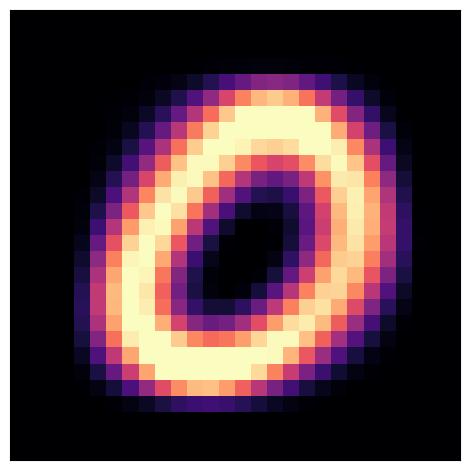

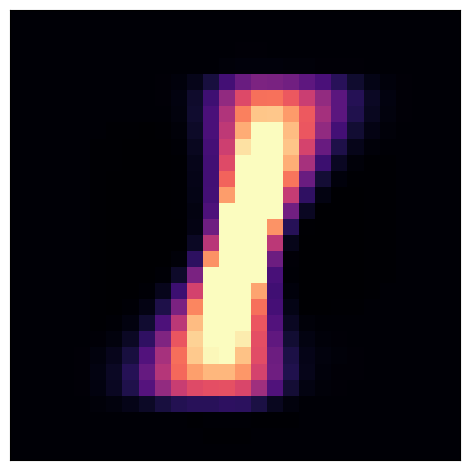

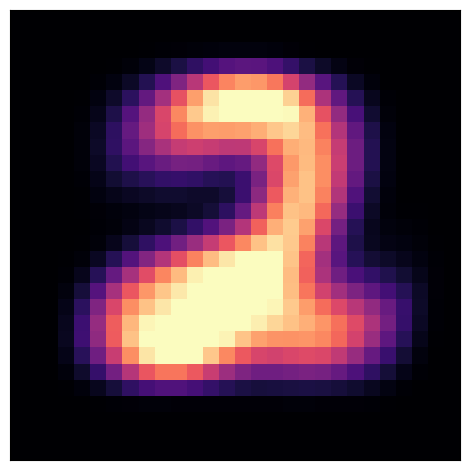

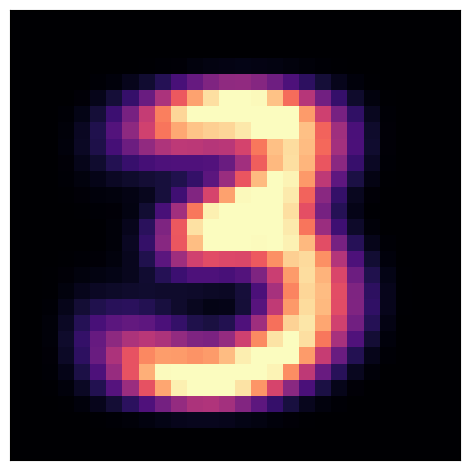

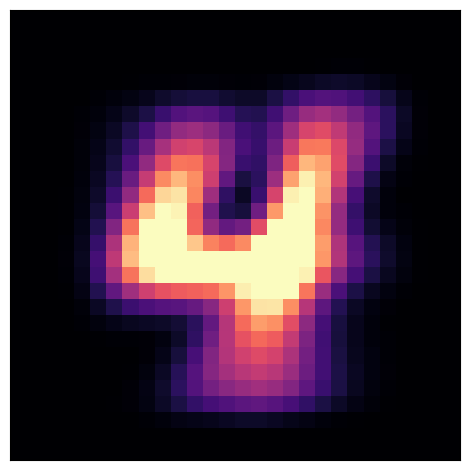

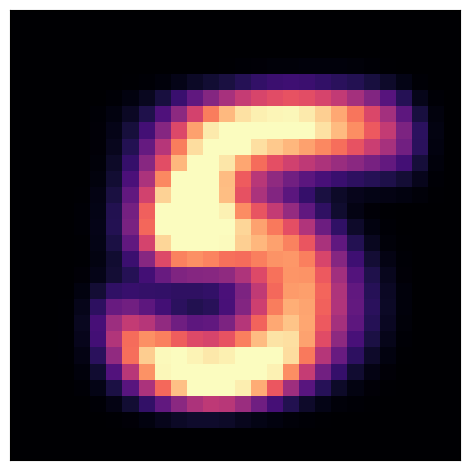

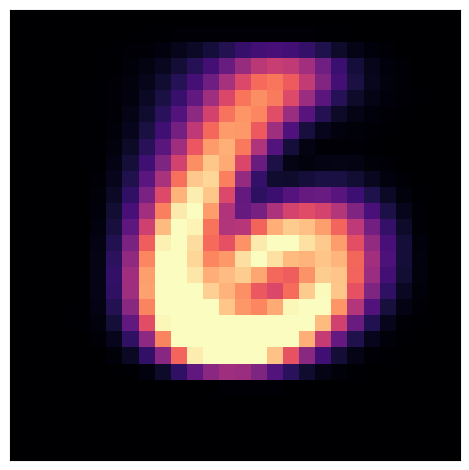

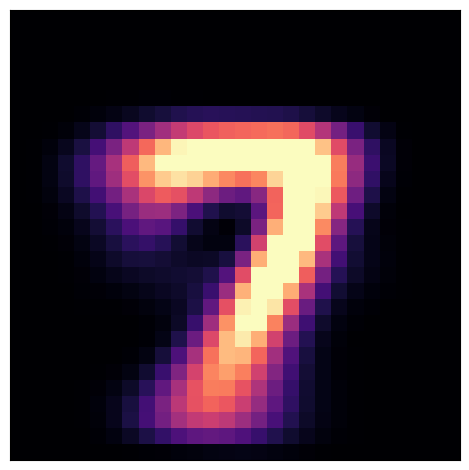

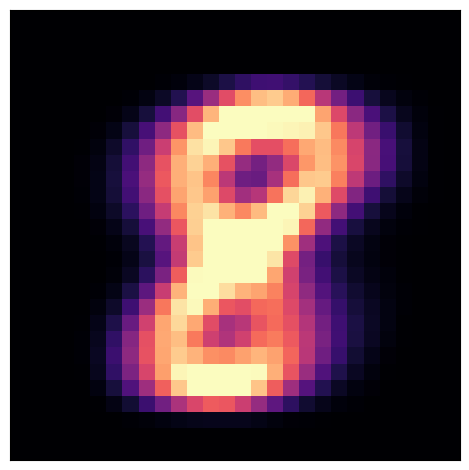

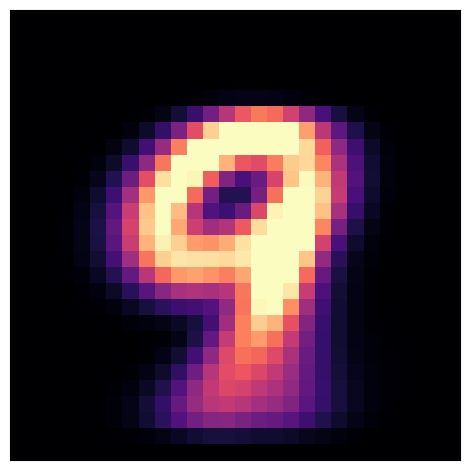

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#view results

w = []

for d in range(10):

    weights = np.fromfile("weights/w" + str(d) + "_test.bin")

    w.append(weights)

    weights = np.reshape(weights[0:len(weights)-1], (28, 28))

    min = np.percentile(weights, 5)
    max = np.percentile(weights, 95)

    norm = mpl.colors.Normalize(vmin = min, vmax = max)

    fig, ax = plt.subplots()
    im = ax.imshow(weights, norm=norm, cmap='magma')

    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()

In [9]:
# testing results with first testing feature
def softmax(w, feature, label):
    dot = []

    for i in range(len(w)):
        dot.append(np.dot(w[i], feature))

    sm = np.exp(dot) / np.sum(np.exp(dot))

    print('Result:', np.argmax(sm), 'Expected:', label)

for i in range(30):
    softmax(w, testing_features[i], testing_labels[i])

Result: 7 Expected: 7.0
Result: 2 Expected: 2.0
Result: 1 Expected: 1.0
Result: 0 Expected: 0.0
Result: 4 Expected: 4.0
Result: 1 Expected: 1.0
Result: 4 Expected: 4.0
Result: 9 Expected: 9.0
Result: 2 Expected: 5.0
Result: 9 Expected: 9.0
Result: 0 Expected: 0.0
Result: 0 Expected: 6.0
Result: 9 Expected: 9.0
Result: 0 Expected: 0.0
Result: 1 Expected: 1.0
Result: 3 Expected: 5.0
Result: 9 Expected: 9.0
Result: 7 Expected: 7.0
Result: 3 Expected: 3.0
Result: 4 Expected: 4.0
Result: 7 Expected: 9.0
Result: 6 Expected: 6.0
Result: 6 Expected: 6.0
Result: 5 Expected: 5.0
Result: 4 Expected: 4.0
Result: 0 Expected: 0.0
Result: 7 Expected: 7.0
Result: 4 Expected: 4.0
Result: 0 Expected: 0.0
Result: 1 Expected: 1.0
